In [1]:
import warnings

warnings.filterwarnings('ignore')

# Katalog Perpustakaan Digital ITB

## Eksplorasi data

Revisi: 12:30 AM UTC+7, 21 Mei 2021

In [2]:
import pandas as pd
import missingno as msno

# baca TSV
katalog = pd.read_csv("katalog_cleaned.tsv", sep="\t")

### Pertumbuhan katalog

Mari kita lihat bagaimana pertumbuhan katalog, berdasarkan informasi dari kolom `date`

In [3]:
# ubah kolom menjadi datetime, lalu bentuk
# DataFrame baru
df = pd.DataFrame(pd.to_datetime(katalog['date']))
df['count'] = 1
df = df.set_index('date')

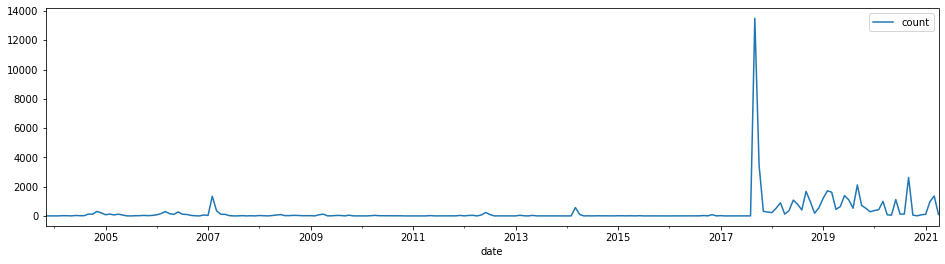

In [4]:
month_view = df.resample('M').sum()
month_view.plot(figsize=(16,4));

In [5]:
month_view.max()[0]

13502

Sepertinya ada bulan ketika 13.5K entri baru ditambahkan ke dalam katalog. Melihat lebih detail, kejadian ini terjadi pada suatu jam saat 14 Februari 2007

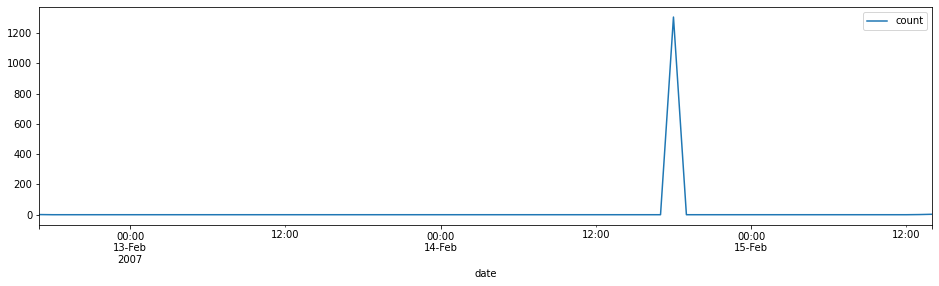

In [6]:
start = pd.to_datetime('2007-02-12 00:00:00')
end = pd.to_datetime('2007-02-16 00:00:00')
df_ = df[(start<=df.index) & (df.index<=end)]

# lihat penambahan per setiap jam pada bulan Februari
df_.resample('H').sum().plot(figsize=(16,4));

Berbeda dengan dugaan saya, *input* secara masal ini tidak berhubungan dengan kemunculan kolom `nidn`. 

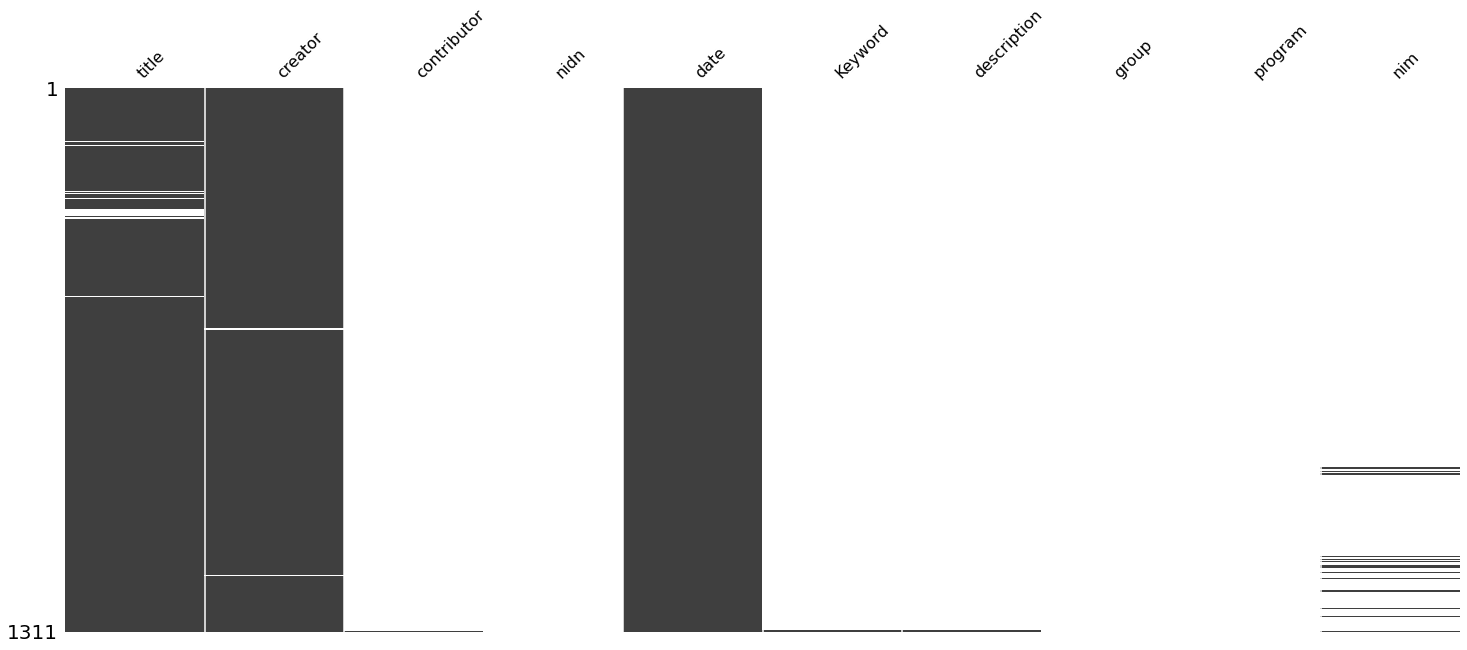

In [7]:
input_range = katalog[(start<=df.index) & (df.index<=end)]
msno.matrix(input_range, sparkline=False);

### Mengenai kolom `description`

Hal lain yang membuat saya penasaran adalah ukuran teks pada kolom `description`: bagaimana pertumbuhan panjang teks `description` secara rata rata?

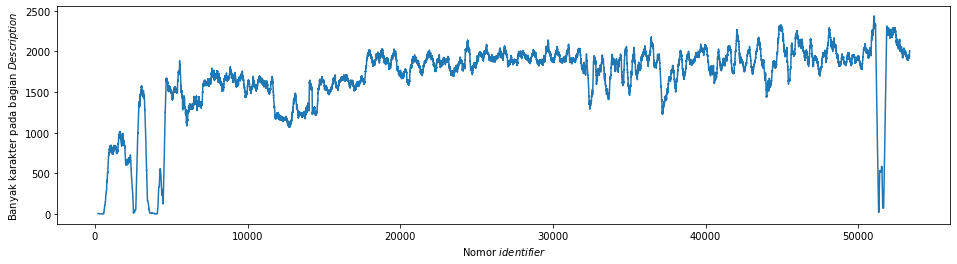

In [8]:
# panjang teks kolom description
size_desc = katalog['description'].fillna('').apply(len)

# hitung moving average
ma100 = size_desc.rolling(window=200).mean()

# plot
ax = ma100.plot(figsize=(16,4))
ax.set_xlabel("Nomor $\it{identifier}$")
ax.set_ylabel("Banyak karakter pada bagian $\it{Description}$");

### Kontribusi dokumen

Coba kita lihat kontribusi dokumen dari setiap program studi

In [9]:
group = katalog.groupby(['group'])

group.count().sort_values(by='title')['title']

# coba buat nested pie chart tentang persentase
# group dan program

group
UPT Perpustakaan      48
?                    183
SITH                1505
FSRD                1644
SF                  1711
FTTM                1895
FITB                2094
Lain-lain           2133
FTI                 2640
SAPPK               2743
FTMD                2781
STEI                3009
FTSL                3370
FMIPA               4590
SBM                 5976
Name: title, dtype: int64